## HOMEWORK TG 5014 - TIME-SPATIAL SERIES DATA ANALYSIS - SHORT TIME FOURIER TRANSFORM
### NAME: REYNALDI SUBANGKIT
### NIM: 223252005

## INSTRUCTION
### Given 4 signals (i) modulated sine wave, (ii) chirp, (iii) cross_chirp, dan (iv) two time series.
#### Length = 128

### DECLARE VARIABLE AND SIGNALS

In [216]:
import numpy as np
import matplotlib.pyplot as plt

length = 128
dt = 1*0.1
fs=1/dt
t = np.arange(0,length,dt)
print (fs)

10.0


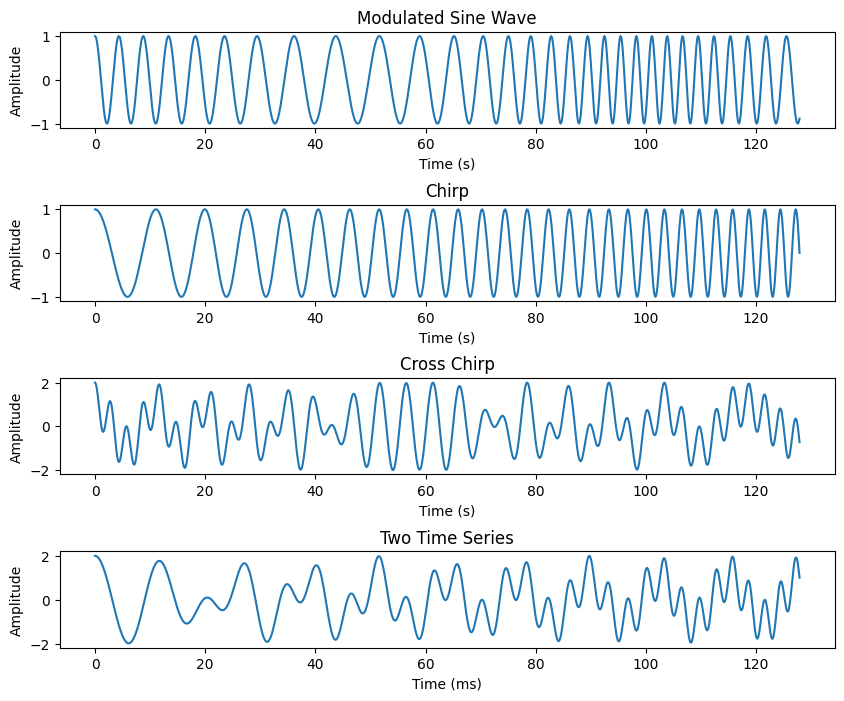

In [217]:
#SIGNAL CALCULATIONS

mod_sin_freq = 4*np.cos(2*np.pi*t/length)+length/5;
mod_sin = np.cos(2*np.pi*mod_sin_freq*t/length)
#print("Mod Sin Freq:/n", mod_sin_freq)
#print("Mod Sin:/n", mod_sin)
chirp = np.cos(2*np.pi*(10+t/7)*t/length)
cross_chirp = np.cos(2*np.pi*(10+t/7)*t/length)+np.cos(2*np.pi*(length/2.8 - t/6)*t/length)
time1 = np.cos(2*np.pi*10*t/length)
time2 = np.cos(2*np.pi*(10+t/7)*t/length)
two_time = time1+time2

fig, axs = plt.subplots(4, 1, figsize=(10, 8))
#Modulated Sine Wave Plot
axs[0].plot(t,mod_sin)
axs[0].set_title("Modulated Sine Wave")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")

#Chirp Plot
axs[1].plot(t,chirp)
axs[1].set_title("Chirp")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")

#Cross Chirp Plot
axs[2].plot(t,cross_chirp)
axs[2].set_title("Cross Chirp")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Amplitude")

#Two Time Series Plot
axs[3].plot(t,two_time)
axs[3].set_title("Two Time Series")
axs[3].set_xlabel("Time (ms)")
axs[3].set_ylabel("Amplitude")

fig.subplots_adjust(hspace=0.8)

In [218]:
print("Length of t: ",len(t))
print("Length of Modulated Sine Wave Series: ",len(mod_sin))

Length of t:  1280
Length of Modulated Sine Wave Series:  1280


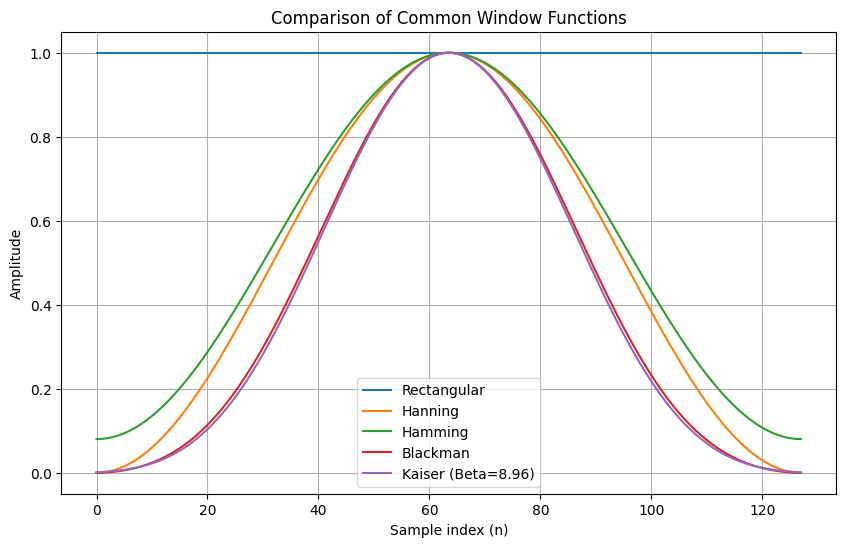

In [200]:
# --- Parameters ---
N = 128  # Window length

# --- Define different windows ---
windows = {
    "Rectangular": np.ones(N),
    "Hanning": np.hanning(N),
    "Hamming": np.hamming(N),
    "Blackman": np.blackman(N),
    "Kaiser (Beta=8.96)": np.kaiser(N, beta=8.96),
}

# --- Plot all windows ---
plt.figure(figsize=(10, 6))
for name, w in windows.items():
    plt.plot(w, label=name, linewidth=1.5)

plt.title("Comparison of Common Window Functions")
plt.xlabel("Sample index (n)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


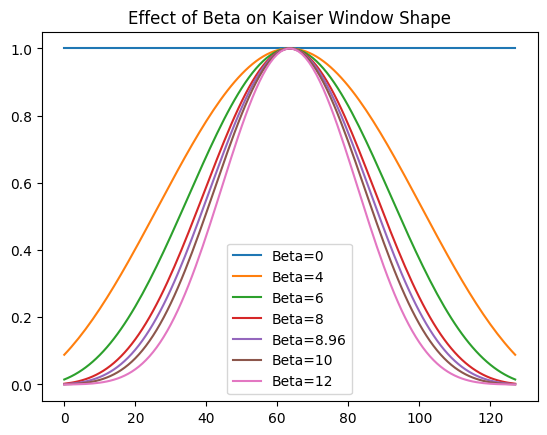

In [199]:
for beta in [0, 4, 6, 8, 8.96, 10, 12]:
    plt.plot(np.kaiser(128, beta), label=f"Beta={beta}")
plt.legend()
plt.title("Effect of Beta on Kaiser Window Shape")
plt.show()


### MODULATED SINE WAVE STFT TIME-FREQUENCY MAP DIFFERENT WINDOWS

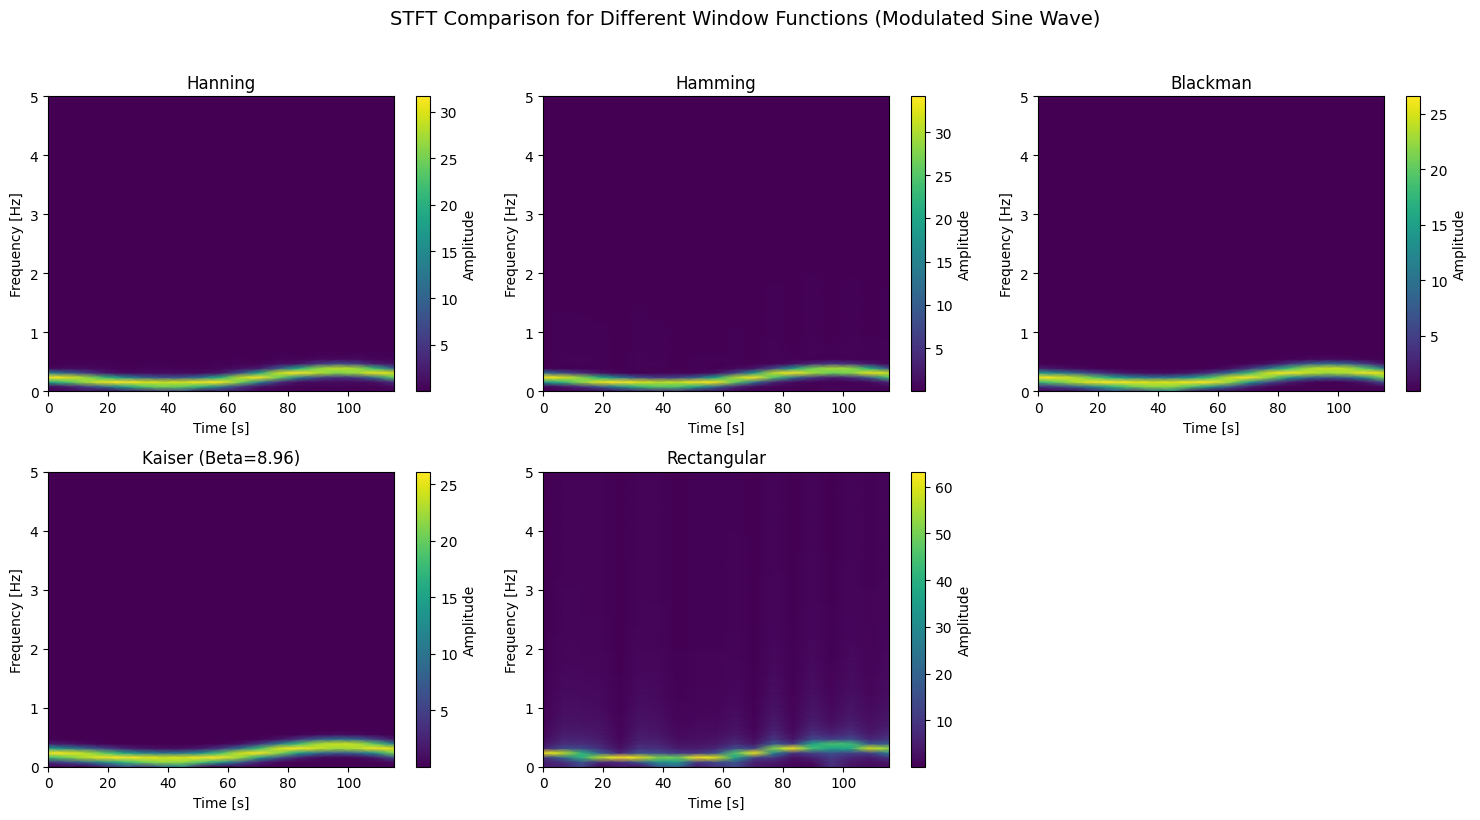

In [211]:
# --- 2. STFT parameters ---
window_size = 128
hop_size = 64

# --- 3. Define window functions (without Bartlett) ---
windows = {
    "Hanning": np.hanning(window_size),
    "Hamming": np.hamming(window_size),
    "Blackman": np.blackman(window_size),
    "Kaiser (Beta=8.96)": np.kaiser(window_size, beta=8.96),
    "Rectangular": np.ones(window_size)
}

# --- 4. Create figure ---
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

# --- 5. STFT and plotting for each window ---
for idx, (name, window) in enumerate(windows.items()):
    n_windows = (len(mod_sin) - window_size) // hop_size + 1
    stft_result = np.zeros((window_size//2 + 1, n_windows), dtype=np.complex64)

    for i in range(n_windows):
        start = i * hop_size
        segment = mod_sin[start:start+window_size] * window
        spectrum = np.fft.rfft(segment)
        stft_result[:, i] = spectrum

    freqs = np.fft.rfftfreq(window_size, 1/fs)
    times = np.arange(n_windows) * (hop_size / fs)

    pcm = axs[idx].pcolormesh(times, freqs, np.abs(stft_result), shading='gouraud')
    axs[idx].set_title(name)
    axs[idx].set_xlabel("Time [s]")
    axs[idx].set_ylabel("Frequency [Hz]")
    fig.colorbar(pcm, ax=axs[idx], label="Amplitude")

# Hide the last empty subplot
axs[-1].axis('off')

plt.suptitle("STFT Comparison for Different Window Functions (Modulated Sine Wave)", fontsize=14, y=1.02)
plt.tight_layout()

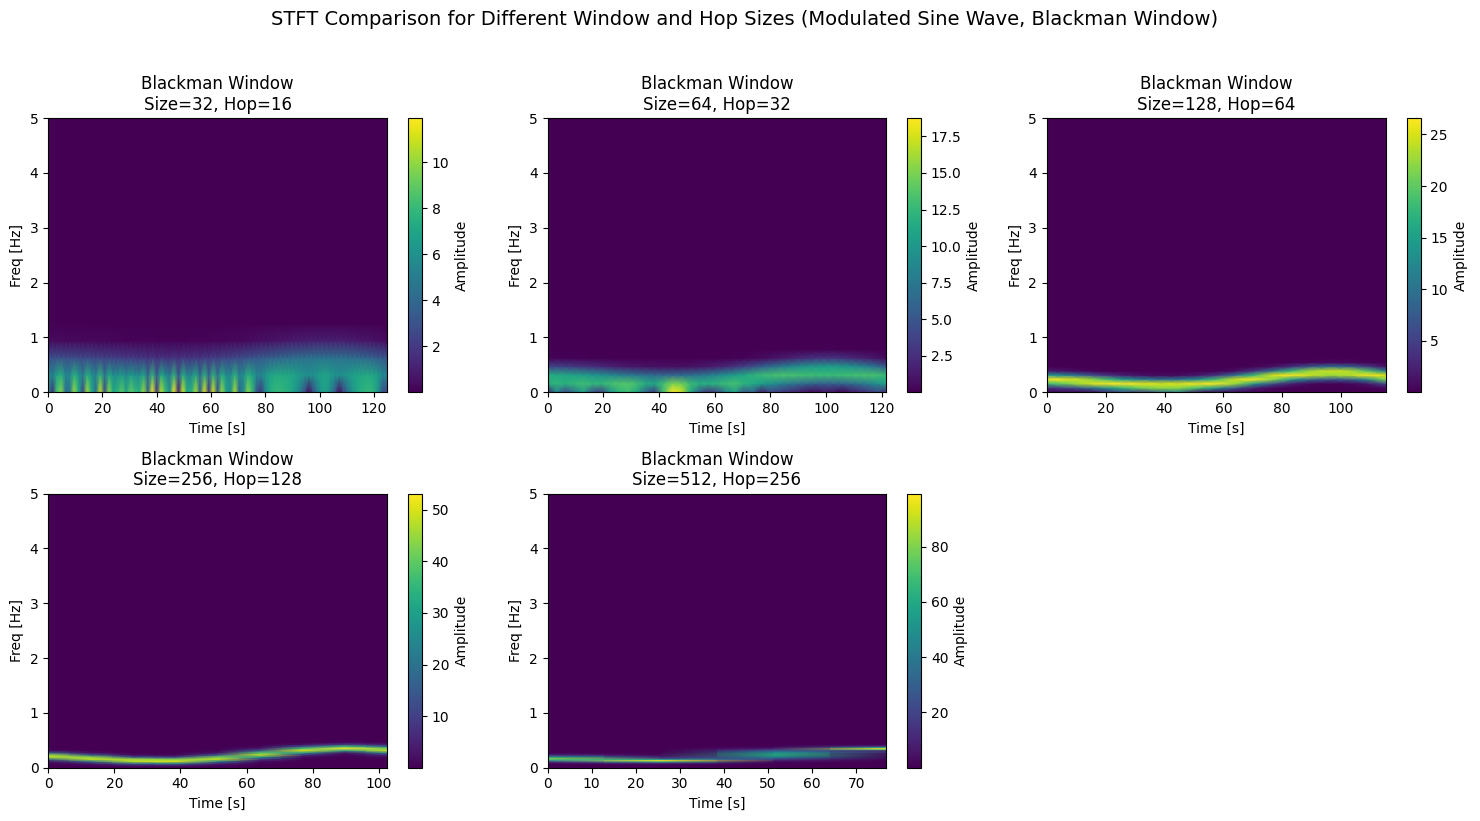

In [221]:
# --- 2. Different window + hop configurations ---
configs = [
    (32, 16),
    (64, 32),
    (128, 64),
    (256, 128),
    (512, 256)
]

# --- 3. Create subplots ---
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

# --- 4. Loop through each configuration ---
for idx, (window_size, hop_size) in enumerate(configs):
    window = np.blackman(window_size)
    n_windows = (len(mod_sin) - window_size) // hop_size + 1
    stft_result = np.zeros((window_size//2 + 1, n_windows), dtype=np.complex64)

    for i in range(n_windows):
        start = i * hop_size
        segment = mod_sin[start:start+window_size] * window
        spectrum = np.fft.rfft(segment)
        stft_result[:, i] = spectrum

    # Axes
    freqs = np.fft.rfftfreq(window_size, 1/fs)
    times = np.arange(n_windows) * (hop_size / fs)

    # Plot each STFT
    pcm = axs[idx].pcolormesh(times, freqs, np.abs(stft_result), shading='gouraud')
    axs[idx].set_title(f"Blackman Window\nSize={window_size}, Hop={hop_size}")
    axs[idx].set_xlabel("Time [s]")
    axs[idx].set_ylabel("Freq [Hz]")
    fig.colorbar(pcm, ax=axs[idx], label="Amplitude")

# Hide unused subplot if any
axs[-1].axis('off')

plt.suptitle("STFT Comparison for Different Window and Hop Sizes (Modulated Sine Wave, Blackman Window)", fontsize=14, y=1.02)
plt.tight_layout()


### CHIRP WAVE STFT TIME-FREQUENCY MAP DIFFERENT WINDOWS

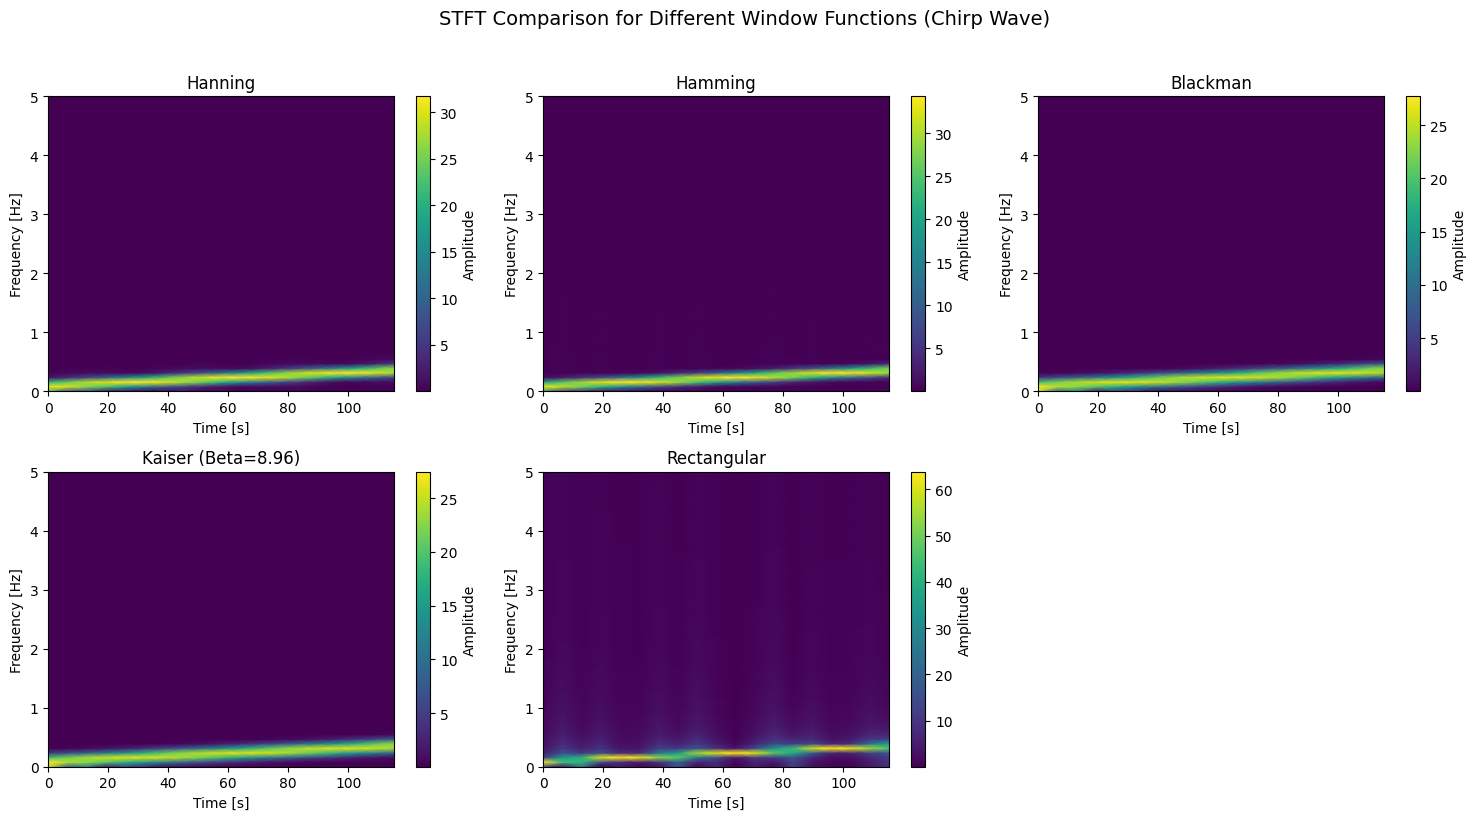

In [212]:
# --- 2. STFT parameters ---
window_size = 128
hop_size = 64

# --- 3. Define window functions (without Bartlett) ---
windows = {
    "Hanning": np.hanning(window_size),
    "Hamming": np.hamming(window_size),
    "Blackman": np.blackman(window_size),
    "Kaiser (Beta=8.96)": np.kaiser(window_size, beta=8.96),
    "Rectangular": np.ones(window_size)
}

# --- 4. Create figure ---
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

# --- 5. STFT and plotting for each window ---
for idx, (name, window) in enumerate(windows.items()):
    n_windows = (len(mod_sin) - window_size) // hop_size + 1
    stft_result = np.zeros((window_size//2 + 1, n_windows), dtype=np.complex64)

    for i in range(n_windows):
        start = i * hop_size
        segment = chirp[start:start+window_size] * window
        spectrum = np.fft.rfft(segment)
        stft_result[:, i] = spectrum

    freqs = np.fft.rfftfreq(window_size, 1/fs)
    times = np.arange(n_windows) * (hop_size / fs)

    pcm = axs[idx].pcolormesh(times, freqs, np.abs(stft_result), shading='gouraud')
    axs[idx].set_title(name)
    axs[idx].set_xlabel("Time [s]")
    axs[idx].set_ylabel("Frequency [Hz]")
    fig.colorbar(pcm, ax=axs[idx], label="Amplitude")

# Hide the last empty subplot
axs[-1].axis('off')

plt.suptitle("STFT Comparison for Different Window Functions (Chirp Wave)", fontsize=14, y=1.02)
plt.tight_layout()

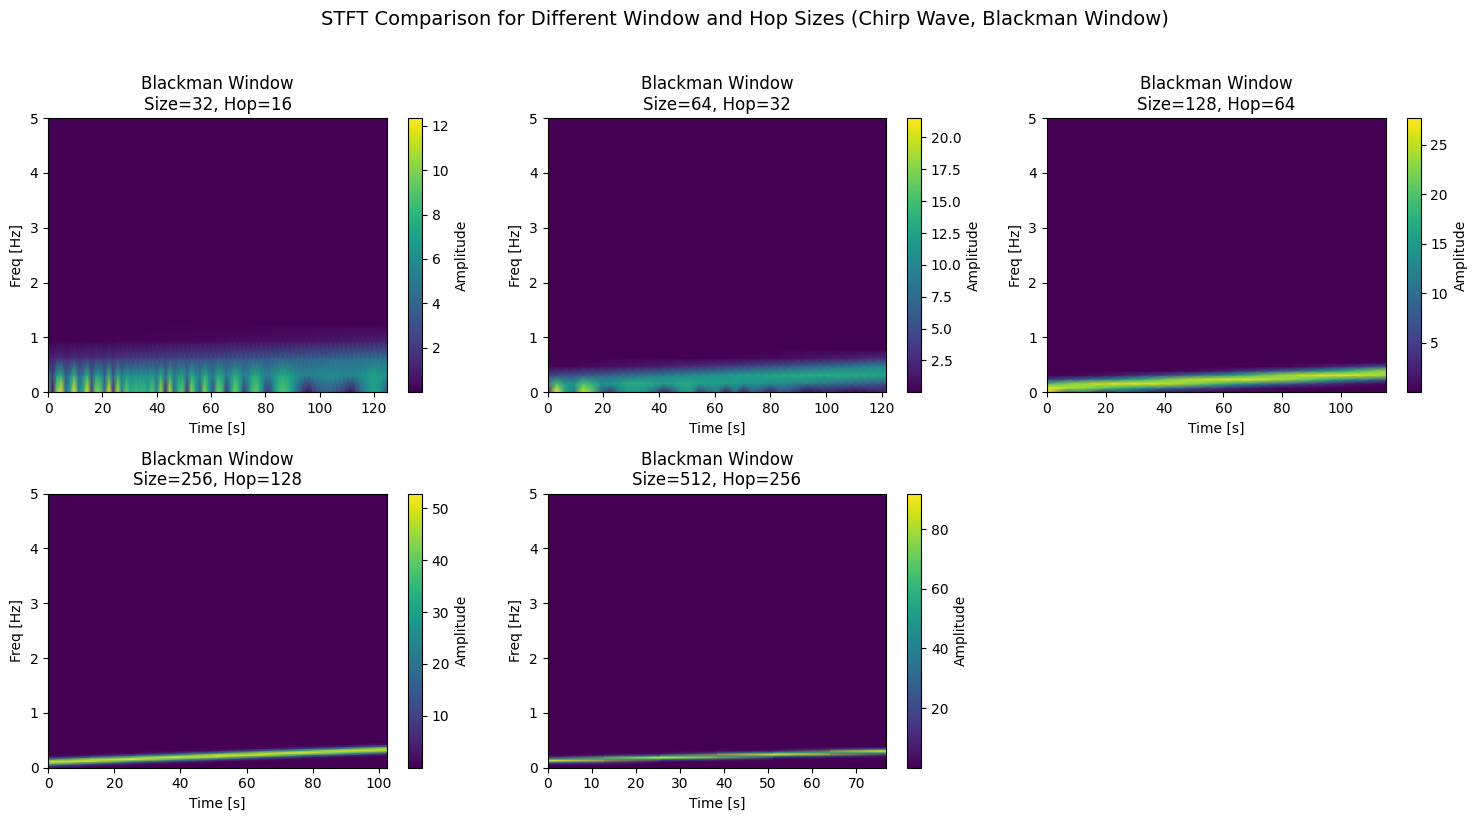

In [222]:
# --- 2. Different window + hop configurations ---
configs = [
    (32, 16),
    (64, 32),
    (128, 64),
    (256, 128),
    (512, 256)
]

# --- 3. Create subplots ---
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

# --- 4. Loop through each configuration ---
for idx, (window_size, hop_size) in enumerate(configs):
    window = np.blackman(window_size)
    n_windows = (len(mod_sin) - window_size) // hop_size + 1
    stft_result = np.zeros((window_size//2 + 1, n_windows), dtype=np.complex64)

    for i in range(n_windows):
        start = i * hop_size
        segment = chirp[start:start+window_size] * window
        spectrum = np.fft.rfft(segment)
        stft_result[:, i] = spectrum

    # Axes
    freqs = np.fft.rfftfreq(window_size, 1/fs)
    times = np.arange(n_windows) * (hop_size / fs)

    # Plot each STFT
    pcm = axs[idx].pcolormesh(times, freqs, np.abs(stft_result), shading='gouraud')
    axs[idx].set_title(f"Blackman Window\nSize={window_size}, Hop={hop_size}")
    axs[idx].set_xlabel("Time [s]")
    axs[idx].set_ylabel("Freq [Hz]")
    fig.colorbar(pcm, ax=axs[idx], label="Amplitude")

# Hide unused subplot if any
axs[-1].axis('off')

plt.suptitle("STFT Comparison for Different Window and Hop Sizes (Chirp Wave, Blackman Window)", fontsize=14, y=1.02)
plt.tight_layout()


### CROSS CHIRP WAVE STFT TIME-FREQUENCY MAP DIFFERENT WINDOWS

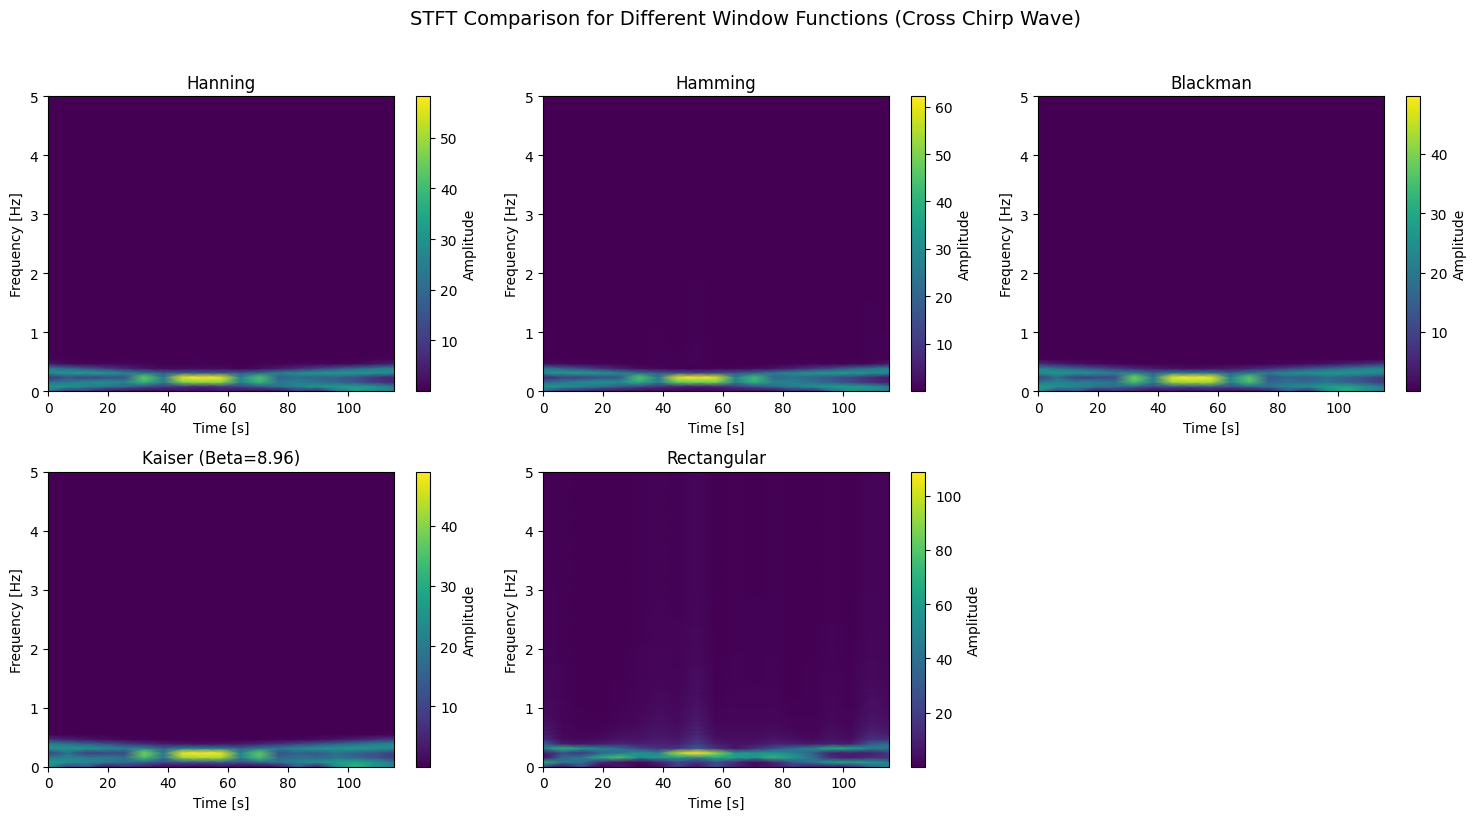

In [213]:
# --- 2. STFT parameters ---
window_size = 128
hop_size = 64

# --- 3. Define window functions (without Bartlett) ---
windows = {
    "Hanning": np.hanning(window_size),
    "Hamming": np.hamming(window_size),
    "Blackman": np.blackman(window_size),
    "Kaiser (Beta=8.96)": np.kaiser(window_size, beta=8.96),
    "Rectangular": np.ones(window_size)
}

# --- 4. Create figure ---
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

# --- 5. STFT and plotting for each window ---
for idx, (name, window) in enumerate(windows.items()):
    n_windows = (len(mod_sin) - window_size) // hop_size + 1
    stft_result = np.zeros((window_size//2 + 1, n_windows), dtype=np.complex64)

    for i in range(n_windows):
        start = i * hop_size
        segment = cross_chirp[start:start+window_size] * window
        spectrum = np.fft.rfft(segment)
        stft_result[:, i] = spectrum

    freqs = np.fft.rfftfreq(window_size, 1/fs)
    times = np.arange(n_windows) * (hop_size / fs)

    pcm = axs[idx].pcolormesh(times, freqs, np.abs(stft_result), shading='gouraud')
    axs[idx].set_title(name)
    axs[idx].set_xlabel("Time [s]")
    axs[idx].set_ylabel("Frequency [Hz]")
    fig.colorbar(pcm, ax=axs[idx], label="Amplitude")

# Hide the last empty subplot
axs[-1].axis('off')

plt.suptitle("STFT Comparison for Different Window Functions (Cross Chirp Wave)", fontsize=14, y=1.02)
plt.tight_layout()

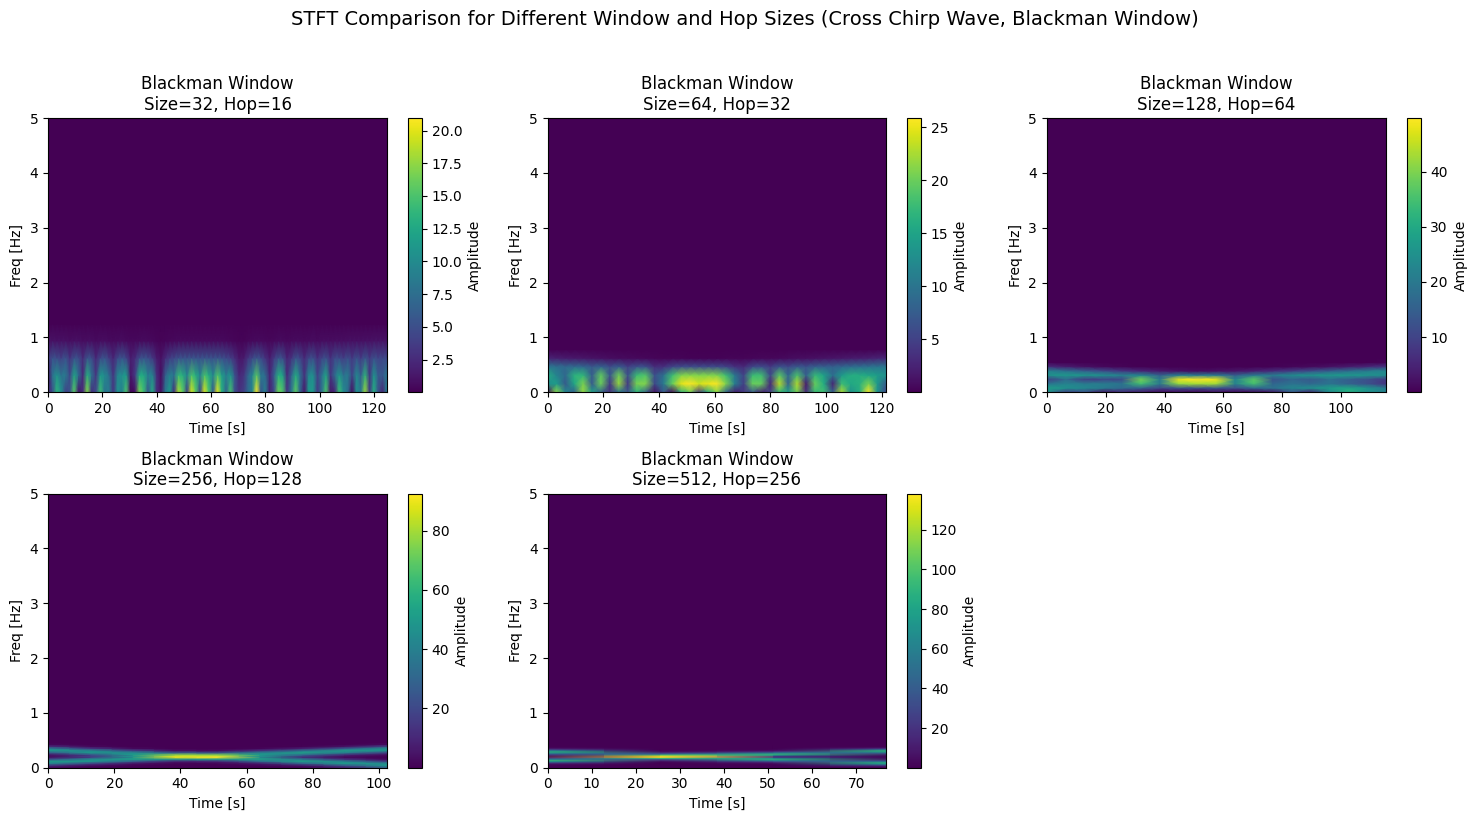

In [224]:
# --- 2. Different window + hop configurations ---
configs = [
    (32, 16),
    (64, 32),
    (128, 64),
    (256, 128),
    (512, 256)
]

# --- 3. Create subplots ---
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

# --- 4. Loop through each configuration ---
for idx, (window_size, hop_size) in enumerate(configs):
    window = np.blackman(window_size)
    n_windows = (len(mod_sin) - window_size) // hop_size + 1
    stft_result = np.zeros((window_size//2 + 1, n_windows), dtype=np.complex64)

    for i in range(n_windows):
        start = i * hop_size
        segment = cross_chirp[start:start+window_size] * window
        spectrum = np.fft.rfft(segment)
        stft_result[:, i] = spectrum

    # Axes
    freqs = np.fft.rfftfreq(window_size, 1/fs)
    times = np.arange(n_windows) * (hop_size / fs)

    # Plot each STFT
    pcm = axs[idx].pcolormesh(times, freqs, np.abs(stft_result), shading='gouraud')
    axs[idx].set_title(f"Blackman Window\nSize={window_size}, Hop={hop_size}")
    axs[idx].set_xlabel("Time [s]")
    axs[idx].set_ylabel("Freq [Hz]")
    fig.colorbar(pcm, ax=axs[idx], label="Amplitude")

# Hide unused subplot if any
axs[-1].axis('off')

plt.suptitle("STFT Comparison for Different Window and Hop Sizes (Cross Chirp Wave, Blackman Window)", fontsize=14, y=1.02)
plt.tight_layout()


### TWO TIME WAVE STFT TIME-FREQUENCY MAP DIFFERENT WINDOWS

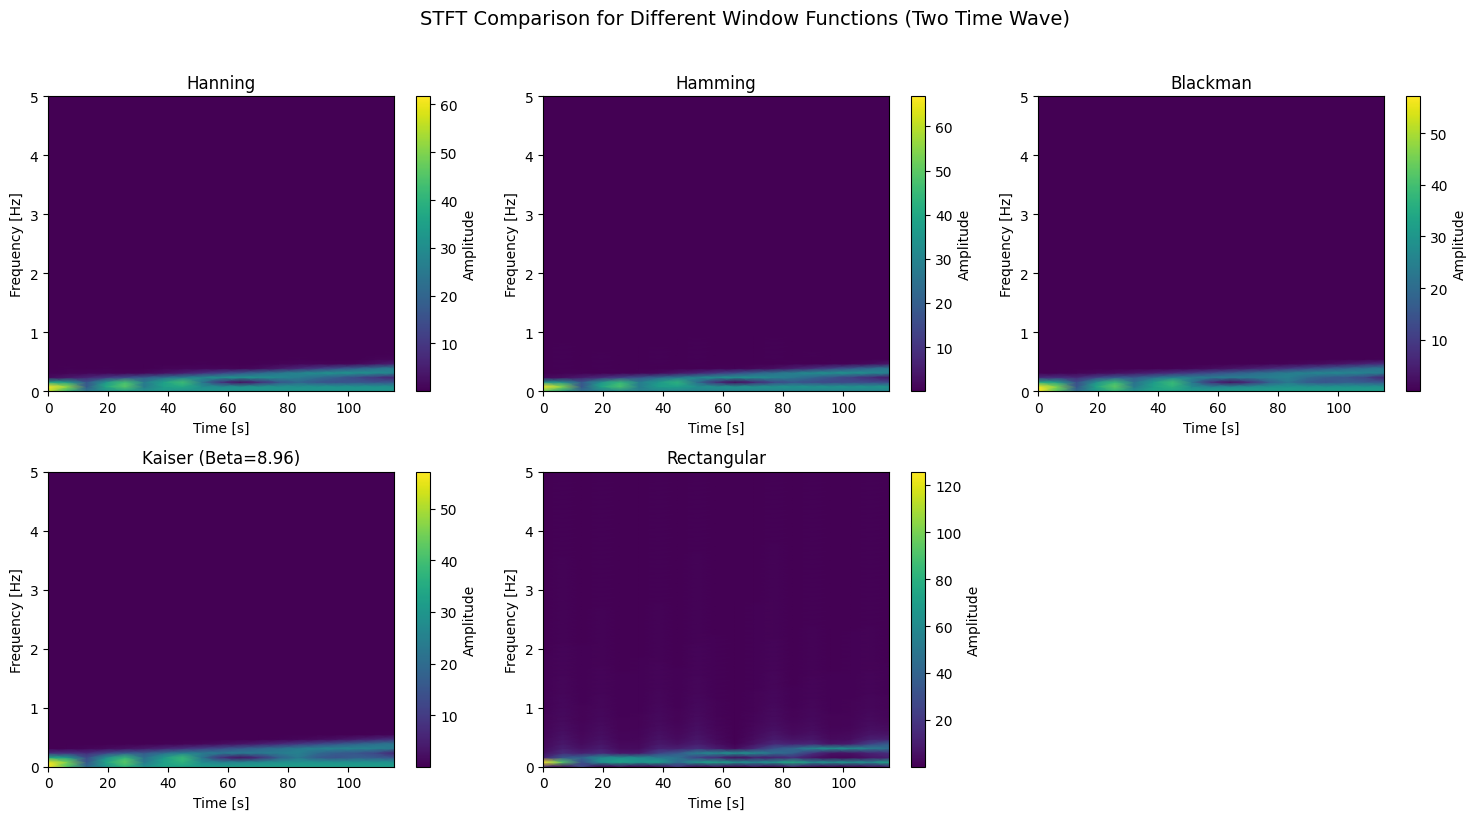

In [214]:
# --- 2. STFT parameters ---
window_size = 128
hop_size = 64

# --- 3. Define window functions (without Bartlett) ---
windows = {
    "Hanning": np.hanning(window_size),
    "Hamming": np.hamming(window_size),
    "Blackman": np.blackman(window_size),
    "Kaiser (Beta=8.96)": np.kaiser(window_size, beta=8.96),
    "Rectangular": np.ones(window_size)
}

# --- 4. Create figure ---
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

# --- 5. STFT and plotting for each window ---
for idx, (name, window) in enumerate(windows.items()):
    n_windows = (len(mod_sin) - window_size) // hop_size + 1
    stft_result = np.zeros((window_size//2 + 1, n_windows), dtype=np.complex64)

    for i in range(n_windows):
        start = i * hop_size
        segment = two_time[start:start+window_size] * window
        spectrum = np.fft.rfft(segment)
        stft_result[:, i] = spectrum

    freqs = np.fft.rfftfreq(window_size, 1/fs)
    times = np.arange(n_windows) * (hop_size / fs)

    pcm = axs[idx].pcolormesh(times, freqs, np.abs(stft_result), shading='gouraud')
    axs[idx].set_title(name)
    axs[idx].set_xlabel("Time [s]")
    axs[idx].set_ylabel("Frequency [Hz]")
    fig.colorbar(pcm, ax=axs[idx], label="Amplitude")

# Hide the last empty subplot
axs[-1].axis('off')

plt.suptitle("STFT Comparison for Different Window Functions (Two Time Wave)", fontsize=14, y=1.02)
plt.tight_layout()

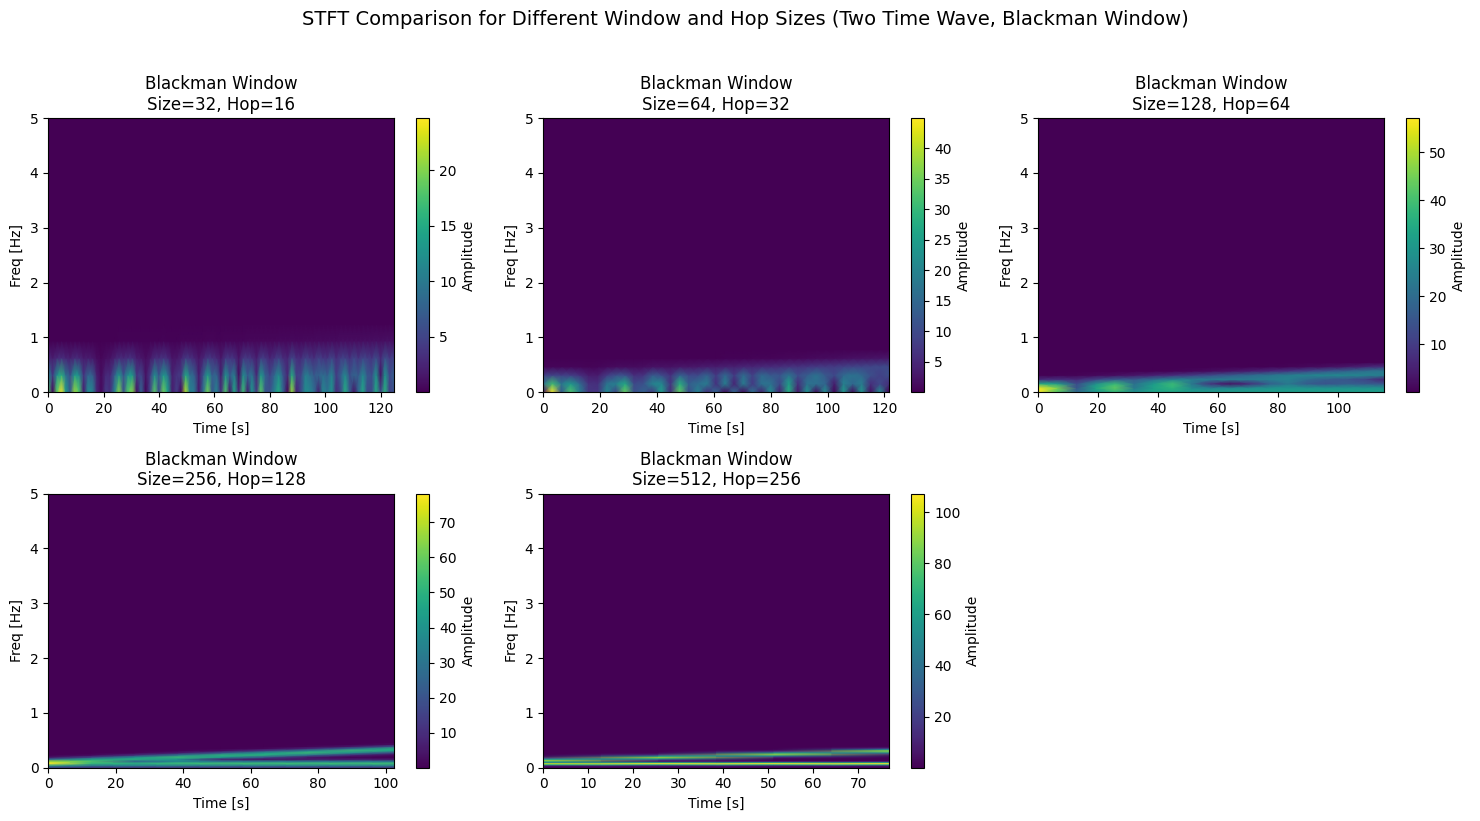

In [226]:
# --- 2. Different window + hop configurations ---
configs = [
    (32, 16),
    (64, 32),
    (128, 64),
    (256, 128),
    (512, 256)
]

# --- 3. Create subplots ---
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

# --- 4. Loop through each configuration ---
for idx, (window_size, hop_size) in enumerate(configs):
    window = np.blackman(window_size)
    n_windows = (len(mod_sin) - window_size) // hop_size + 1
    stft_result = np.zeros((window_size//2 + 1, n_windows), dtype=np.complex64)

    for i in range(n_windows):
        start = i * hop_size
        segment = two_time[start:start+window_size] * window
        spectrum = np.fft.rfft(segment)
        stft_result[:, i] = spectrum

    # Axes
    freqs = np.fft.rfftfreq(window_size, 1/fs)
    times = np.arange(n_windows) * (hop_size / fs)

    # Plot each STFT
    pcm = axs[idx].pcolormesh(times, freqs, np.abs(stft_result), shading='gouraud')
    axs[idx].set_title(f"Blackman Window\nSize={window_size}, Hop={hop_size}")
    axs[idx].set_xlabel("Time [s]")
    axs[idx].set_ylabel("Freq [Hz]")
    fig.colorbar(pcm, ax=axs[idx], label="Amplitude")

# Hide unused subplot if any
axs[-1].axis('off')

plt.suptitle("STFT Comparison for Different Window and Hop Sizes (Two Time Wave, Blackman Window)", fontsize=14, y=1.02)
plt.tight_layout()
